## Assignment #4 - Sensor Data in Red Hook

### Analyzing the data collected by four sensors in the neighborhood of Red Hook for luminosity, air quality, and noise levels.

#### Jonathan Geis - UISSC

In [1]:

from __future__ import print_function
from __future__ import division


import pylab as pl
import numpy as np
import pandas as pd
import os
import json
import requests
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf




%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
#load the densor data from the csv
SensorData = pd.read_csv('LuxDustNoise_summarized_4hour_0719.csv')

In [18]:
#Check what the dataset looks like
SensorData.head()

,dt,sensor,lux,con,spl
0,2016-06-21 00:00:00,sensor_0,0.0,2834.03125,66.308479
1,2016-06-21 00:00:00,sensor_2,0.0,1691.99625,70.375943
2,2016-06-21 00:00:00,sensor_3,0.0,1686.44125,76.235738
3,2016-06-21 00:00:00,sensor_4,0.0,2324.65875,70.652334
4,2016-06-21 04:00:00,sensor_0,3213.5,2748.28875,81.467436


In [23]:
#convert dt column to timestamp
SensorData['dt'] = pd.to_datetime(SensorData['dt'], format='%Y-%m-%d %H:%M:%S')

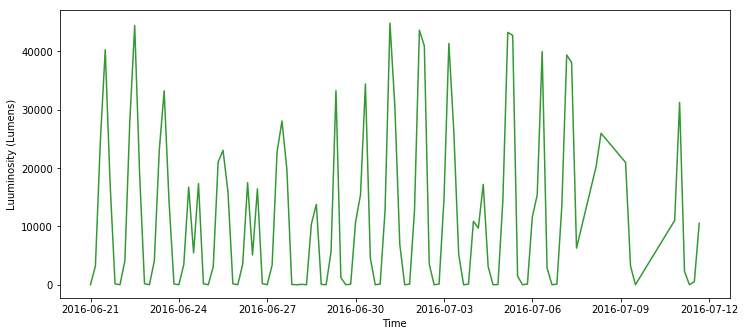

In [57]:
#Start by plotting only one sensor
pl.figure(figsize=(12, 18))

pl.subplot(3, 1, 1)
pl.xlabel("Time")
pl.ylabel("Luuminosity (Lumens)") 
pl.plot(SensorData[SensorData.sensor == 'sensor_0'].dt, SensorData[SensorData.sensor == 'sensor_0'].lux,'g',
        alpha=0.8, label="Sensor 0")

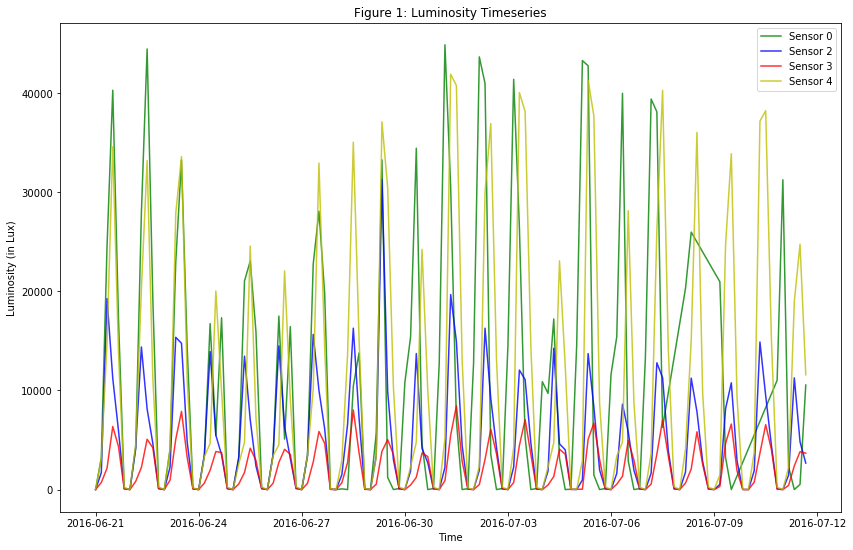

In [51]:
#Plot all sensors for Luminosity

pl.figure(figsize=(14, 9))

pl.xlabel("Time")
pl.ylabel("Luminosity (in Lux)") 
pl.plot(SensorData[SensorData.sensor == 'sensor_0'].dt, SensorData[SensorData.sensor == 'sensor_0'].lux,'g', 
        alpha=0.8, label="Sensor 0")
pl.plot(SensorData[SensorData.sensor == 'sensor_2'].dt, SensorData[SensorData.sensor == 'sensor_2'].lux,'b', 
        alpha=0.8, label="Sensor 2")
pl.plot(SensorData[SensorData.sensor == 'sensor_3'].dt, SensorData[SensorData.sensor == 'sensor_3'].lux,'r', 
        alpha=0.8, label="Sensor 3")
pl.plot(SensorData[SensorData.sensor == 'sensor_4'].dt, SensorData[SensorData.sensor == 'sensor_4'].lux,'y', 
        alpha=0.8, label="Sensor 4")

pl.title("Figure 1: Luminosity Timeseries")
pl.legend(loc = 'upper right')


#### The luminosity data in figure 1 display the pattern to be expected from daylight. All four sensors have the same period but since sensor 0 and sensor 4 are both located on roofs they get more sunlight and therefore they have higher spikes than sensors 2 and 3. The time where there is some luminosity is higher than the time where there isn't and that's consistent with the longer days in the month of June. Finally, in 2016, June 24th and July 4th were both cloudy days which explains the reduced luminosity on those days.

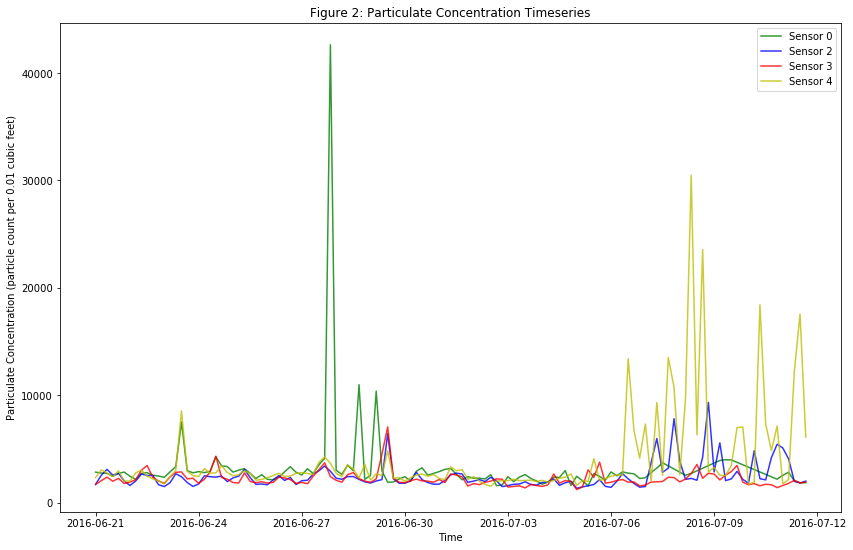

In [54]:
#Plot all sensors for Particulate Concentration

pl.figure(figsize=(14, 9))

pl.xlabel("Time")
pl.ylabel("Particulate Concentration (particle count per 0.01 cubic feet)") 
pl.plot(SensorData[SensorData.sensor == 'sensor_0'].dt, SensorData[SensorData.sensor == 'sensor_0'].con,'g', 
        alpha=0.8, label="Sensor 0")
pl.plot(SensorData[SensorData.sensor == 'sensor_2'].dt, SensorData[SensorData.sensor == 'sensor_2'].con,'b', 
        alpha=0.8, label="Sensor 2")
pl.plot(SensorData[SensorData.sensor == 'sensor_3'].dt, SensorData[SensorData.sensor == 'sensor_3'].con,'r', 
        alpha=0.8, label="Sensor 3")
pl.plot(SensorData[SensorData.sensor == 'sensor_4'].dt, SensorData[SensorData.sensor == 'sensor_4'].con,'y', 
        alpha=0.8, label="Sensor 4")

pl.title("Figure 2: Particulate Concentration Timeseries")
pl.legend(loc = 'upper right')

#### The sensor data on particulate concentration displayed in Figure 2 doesn't show much variation except for a few large spikes. These could be caused by a sudden increase in particulate concentration such as a construction crew working all day near a sensor. The spike on June 23rd may have been caused by something high in the air because both of the sensors on a roof display the spike and the other two sensors at street level do not.

In [86]:
#Looking at descriptive statistics to remove outliers
sensor_0_con_mean = SensorData[SensorData.sensor == 'sensor_0'].con.mean()
sensor_0_con_median = SensorData[SensorData.sensor == 'sensor_0'].con.median()
sensor_0_con_std = SensorData[SensorData.sensor == 'sensor_0'].con.std()

sensor_2_con_mean = SensorData[SensorData.sensor == 'sensor_2'].con.mean()
sensor_2_con_median = SensorData[SensorData.sensor == 'sensor_2'].con.median()
sensor_2_con_std = SensorData[SensorData.sensor == 'sensor_2'].con.std()

sensor_3_con_mean = SensorData[SensorData.sensor == 'sensor_3'].con.mean()
sensor_3_con_median = SensorData[SensorData.sensor == 'sensor_3'].con.median()
sensor_3_con_std = SensorData[SensorData.sensor == 'sensor_3'].con.std()

sensor_4_con_mean = SensorData[SensorData.sensor == 'sensor_4'].con.mean()
sensor_4_con_median = SensorData[SensorData.sensor == 'sensor_4'].con.median()
sensor_4_con_std = SensorData[SensorData.sensor == 'sensor_4'].con.std()

print ("sensor_0 particulate concentration: mean is " + str(sensor_0_con_mean) + 
       ", median is " + str(sensor_0_con_median) + ", standard deviation is " + str(sensor_0_con_std))

print ("sensor_2 particulate concentration: mean is " + str(sensor_2_con_mean) + 
       ", median is " + str(sensor_2_con_median) + ", standard deviation is " + str(sensor_2_con_std))

print ("sensor_3 particulate concentration: mean is " + str(sensor_3_con_mean) + 
       ", median is " + str(sensor_3_con_median) + ", standard deviation is " + str(sensor_3_con_std))

print ("sensor_4 particulate concentration: mean is " + str(sensor_4_con_mean) + 
       ", median is " + str(sensor_4_con_median) + ", standard deviation is " + str(sensor_4_con_std))

sensor_0 particulate concentration: mean is 3185.438356821172, median is 2680.4325, standard deviation is 3988.02933631318
sensor_2 particulate concentration: mean is 2460.0258599999993, median is 2135.28875, standard deviation is 1209.5922544099888
sensor_3 particulate concentration: mean is 2198.28025666664, median is 2010.21875, standard deviation is 713.858080337311
sensor_4 particulate concentration: mean is 3949.7113099999992, median is 2555.0975, standard deviation is 4183.684507740535


#### Sensor 0 and sensor 4 have very high values that skew the data. We will remove these outliers and perform the analysis.

In [79]:
#Summary statistics for all sensors
sensors_con_mean = SensorData.con.mean()
sensors_con_median = SensorData.con.median()
sensors_con_std = SensorData.con.std()

print ("All sensors particulate concentration: mean is " + str(sensors_con_mean) + 
       ", median is " + str(sensors_con_median) + ", standard deviation is " + str(sensors_con_std))

All sensors particulate concentration: mean is 2941.5346418528375, median is 2336.1875, standard deviation is 3010.6979497507728


In [80]:
#Remove outliers above two standard deviations from the mean

maxVal = sensors_con_mean + 2 * sensors_con_std
SensorData_clean = SensorData[SensorData.con <= maxVal]

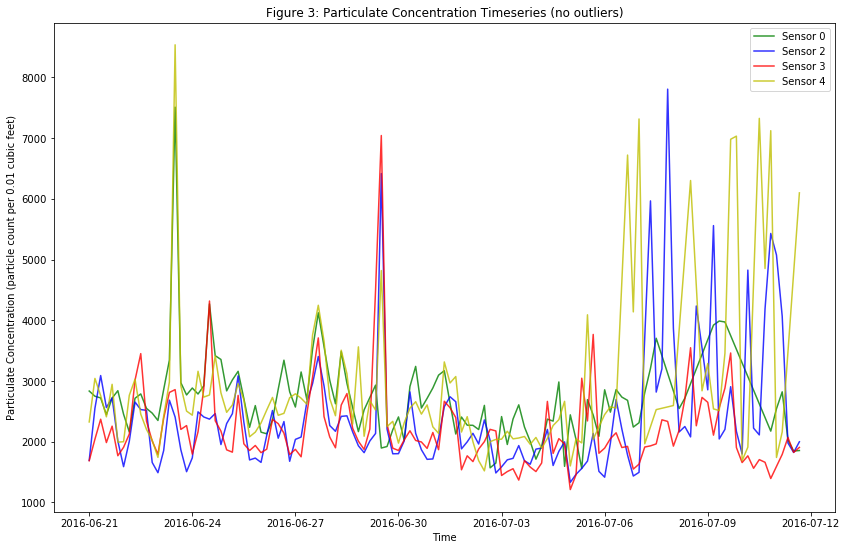

In [90]:
#Plot all sensors for Particulate Concentration without outliers

pl.figure(figsize=(14, 9))

pl.xlabel("Time")
pl.ylabel("Particulate Concentration (particle count per 0.01 cubic feet)") 
pl.plot(SensorData_clean[SensorData_clean.sensor == 'sensor_0'].dt, 
        SensorData_clean[SensorData_clean.sensor == 'sensor_0'].con,'g', 
        alpha=0.8, label="Sensor 0")
pl.plot(SensorData_clean[SensorData_clean.sensor == 'sensor_2'].dt, 
        SensorData_clean[SensorData_clean.sensor == 'sensor_2'].con,'b', 
        alpha=0.8, label="Sensor 2")
pl.plot(SensorData_clean[SensorData_clean.sensor == 'sensor_3'].dt, 
        SensorData_clean[SensorData_clean.sensor == 'sensor_3'].con,'r', 
        alpha=0.8, label="Sensor 3")
pl.plot(SensorData_clean[SensorData_clean.sensor == 'sensor_4'].dt, 
        SensorData_clean[SensorData_clean.sensor == 'sensor_4'].con,'y', 
        alpha=0.8, label="Sensor 4")

pl.title("Figure 3: Particulate Concentration Timeseries (no outliers)")
pl.legend(loc = 'upper right')

#### After removing the outliers, it's more obvious that there is a periodicity to the particulate concentration. It may be due to traffic and congestion during the day and a drop during the night. We can compare it with the luminosity data to see if they increase in tandem. I expected the spikes to be tied to the day of the week. Perhaps Friday when many people are leaving the city during the summer. However, the spikes seem to have happened independently from what day it was.

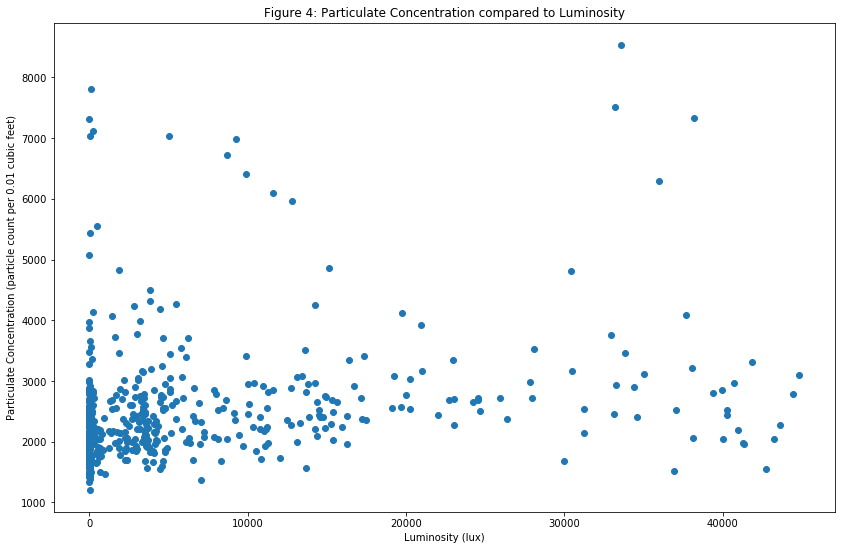

In [91]:
#Plot all sensors together for Particulate Concentration without outliers comapred to Luminosity to see if Particulate concentration
#is tied to the time of day

pl.figure(figsize=(14, 9))

pl.xlabel("Luminosity (lux)")
pl.ylabel("Particulate Concentration (particle count per 0.01 cubic feet)") 
pl.scatter(SensorData_clean.lux, SensorData_clean.con)


pl.title("Figure 4: Particulate Concentration compared to Luminosity")


#### Based on the scatterplot in figure 4, it doesn't appear that air quality varies along with luminosity.

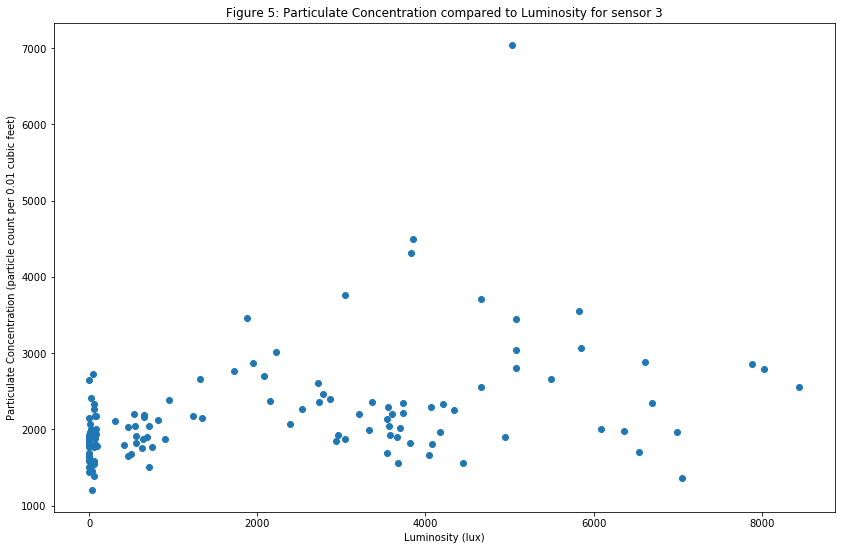

In [101]:
#Plot one sensor alone to see Particulate concentration compared to luminosity
#is tied to the time of day

pl.figure(figsize=(14, 9))

pl.xlabel("Luminosity (lux)")
pl.ylabel("Particulate Concentration (particle count per 0.01 cubic feet)") 
pl.scatter(SensorData[SensorData.sensor == 'sensor_3'].lux, SensorData[SensorData.sensor == 'sensor_3'].con)


pl.title("Figure 5: Particulate Concentration compared to Luminosity for sensor 3")

#### There doesn't appear to be a correlation between air quality and luminosity even when looking at only one sensor.

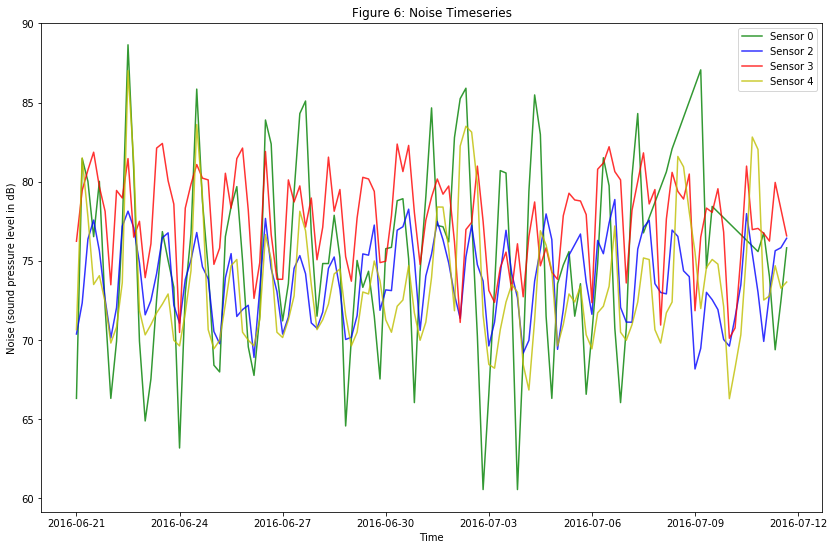

In [106]:
#Plotting the Noise

pl.figure(figsize=(14, 9))

pl.xlabel("Time")
pl.ylabel("Noise (sound pressure level in dB)") 
pl.plot(SensorData[SensorData.sensor == 'sensor_0'].dt, SensorData[SensorData.sensor == 'sensor_0'].spl,'g', 
        alpha=0.8, label="Sensor 0")
pl.plot(SensorData[SensorData.sensor == 'sensor_2'].dt, SensorData[SensorData.sensor == 'sensor_2'].spl,'b', 
        alpha=0.8, label="Sensor 2")
pl.plot(SensorData[SensorData.sensor == 'sensor_3'].dt, SensorData[SensorData.sensor == 'sensor_3'].spl,'r', 
        alpha=0.8, label="Sensor 3")
pl.plot(SensorData[SensorData.sensor == 'sensor_4'].dt, SensorData[SensorData.sensor == 'sensor_4'].spl,'y', 
        alpha=0.8, label="Sensor 4")

pl.title("Figure 6: Noise Timeseries")
pl.legend(loc = 'upper right')

In [105]:
sensor_0_spl_min = SensorData[SensorData.sensor == 'sensor_0'].spl.min()
sensor_0_spl_max = SensorData[SensorData.sensor == 'sensor_0'].spl.max()

print ("sensor_0 noise: min is " + str(sensor_0_spl_min) + 
       ", max is " + str(sensor_0_spl_max))


sensor_0 noise: min is 60.5471786877, max is 88.6478751965


#### From figure 6, it looks like the noise data has a daily periodicity and the four sensors capture the same variations. Sensor 0 has the highest variation going from a minimum of 60.5 dB to a maximum of 88.6 dB.

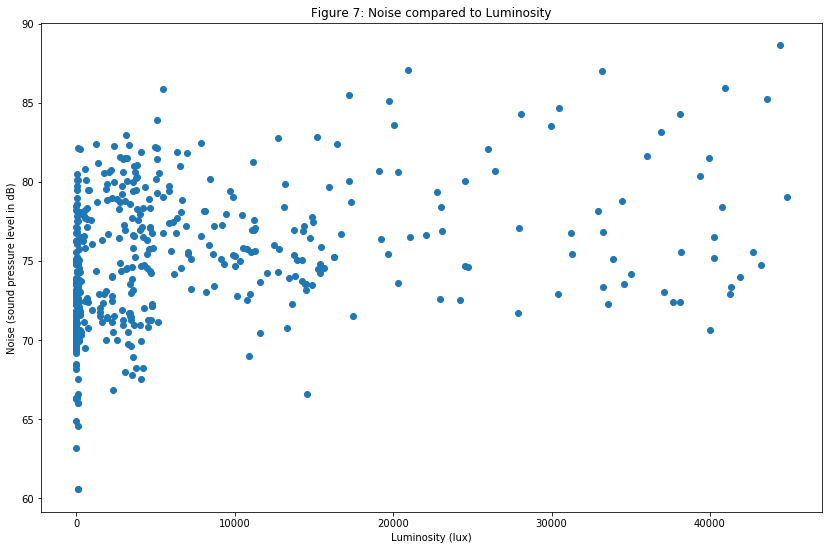

In [108]:
#Plot all sensors together for Noise compared to Luminosity to see if Noise is tied to the time of day

pl.figure(figsize=(14, 9))

pl.xlabel("Luminosity (lux)")
pl.ylabel("Noise (sound pressure level in dB)") 
pl.scatter(SensorData_clean.lux, SensorData_clean.spl)


pl.title("Figure 7: Noise compared to Luminosity")

#### There is no discernible pattern between Noise and Luminosity.

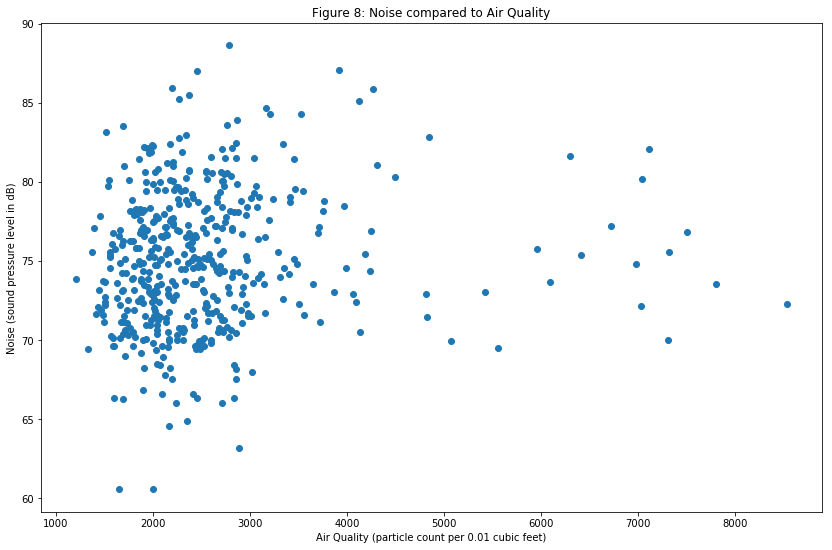

In [113]:
#Plot all sensors together for Noise compared to Air Quality to see if they are related.

pl.figure(figsize=(14, 9))

pl.xlabel("Air Quality (particle count per 0.01 cubic feet)")
pl.ylabel("Noise (sound pressure level in dB)") 
pl.scatter(SensorData_clean.con, SensorData_clean.spl)


pl.title("Figure 8: Noise compared to Air Quality")

#### There is no discernible pattern between Noise and Air Quality.

## We will get 311 complaints for Red Hook to compare noise complaints with the noise data

In [121]:
# Read the CSV file of 311 complaints

RH_311 = pd.read_csv('RedHook_311.csv')

RH_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,33655882,6/21/2016 13:39,6/29/2016 16:15,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),NaN,11231,39 COFFEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674585,-74.011727,"(40.674584679489016, -74.0117273177029)"
1,33670617,6/23/2016 4:59,6/24/2016 7:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11231,344 DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.683184,-73.993795,"(40.68318448547265, -73.99379486119578)"
2,33671392,6/23/2016 20:38,6/27/2016 12:02,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11231,366 PRESIDENT STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679880,-73.991470,"(40.67987963026161, -73.99146970897269)"
3,33672693,6/24/2016 1:03,6/24/2016 8:23,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11231,31 CENTRE MALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675839,-74.006843,"(40.67583943578303, -74.00684256616371)"
4,33673413,6/23/2016 22:17,6/23/2016 23:10,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11231,177 COLUMBIA STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.686020,-74.002210,"(40.686019980669826, -74.00221029159218)"


In [124]:
# Convert time so we can compare the datasets

RH_311['Created Date'] = pd.to_datetime(RH_311['Created Date'], format='%m/%d/%Y %H:%M')

In [131]:
#Find the times with the highest noise levels captured by the sensors

sensor_0_spl_max = SensorData[SensorData.sensor == 'sensor_0'].spl.max()
sensor_2_spl_max = SensorData[SensorData.sensor == 'sensor_2'].spl.max()
sensor_3_spl_max = SensorData[SensorData.sensor == 'sensor_3'].spl.max()
sensor_4_spl_max = SensorData[SensorData.sensor == 'sensor_4'].spl.max()

In [134]:
print (SensorData[SensorData.spl == sensor_0_spl_max])
print (SensorData[SensorData.spl == sensor_2_spl_max])
print (SensorData[SensorData.spl == sensor_3_spl_max])
print (SensorData[SensorData.spl == sensor_4_spl_max])

                    dt    sensor        lux         con        spl
36 2016-06-22 12:00:00  sensor_0  44426.625  2786.37125  88.647875
                     dt    sensor       lux      con        spl
377 2016-07-06 16:00:00  sensor_2  1943.125  1779.05  78.871583
                    dt    sensor      lux       con        spl
62 2016-06-23 12:00:00  sensor_3  7879.75  2857.315  82.415898
                    dt    sensor       lux         con        spl
39 2016-06-22 12:00:00  sensor_4  33164.75  2453.33875  87.013511


In [139]:
#Find how many 311 complaints were around the same time as the max captured by the sensors

#for max of sensors 0 and 4
print (len(RH_311[(RH_311['Created Date'] > '2016-06-22 10:00:00') & (RH_311['Created Date'] < '2016-06-22 16:00:00')]))

#for max of sensor 2
print (len(RH_311[(RH_311['Created Date'] > '2016-07-06 14:00:00') & (RH_311['Created Date'] < '2016-07-06 20:00:00')]))

#for max of sensor 3
print (len(RH_311[(RH_311['Created Date'] > '2016-06-23 10:00:00') & (RH_311['Created Date'] < '2016-06-23 16:00:00')]))

0
1
0


In [140]:
#list the complaint that coincides with the max for sensor 2

RH_311[(RH_311['Created Date'] > '2016-07-06 14:00:00') & (RH_311['Created Date'] < '2016-07-06 20:00:00')]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
58,33768436,2016-07-06 17:07:00,7/6/2016 18:29,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11231,80 DWIGHT STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676215,-74.008818,"(40.676215335436034, -74.00881823560762)"


In [141]:
#move this to the bottom part
#install geopy to access coordinates from address based on https://pypi.python.org/pypi/geopy
from geopy.geocoders import Nominatim
from geopy.distance import vincenty

In [151]:
geolocator = Nominatim()
sensor_2 = geolocator.geocode("106 Ferris Street Brooklyn")

print("sensor_2 is at latitude: " + str(sensor_2.latitude) +\
      ", longitude: " + str(sensor_2.longitude))

sensor_2 is at latitude: 40.67798885, longitude: -74.0175965


In [152]:
complaint_loc = geolocator.geocode("80 Dwight Street Brooklyn")

print("Noise Complaint is at latitude: " + str(complaint_loc.latitude) +\
      ", longitude: " + str(complaint_loc.longitude))

Noise Complaint is at latitude: 40.6765102, longitude: -74.0094905


In [153]:
#calculate distance between the two points using geopy's vincenty function

sensor_2 = (sensor_2.latitude, sensor_2.longitude)
complaint_loc = (complaint_loc.latitude, complaint_loc.longitude)
print(vincenty(sensor_2, complaint_loc).miles)

0.43788795083793336


#### Even though the complaint happened shortly after the sensor captured its highest noise value, since the complaint was recorded 0.4 miles from the sensor, I would assume that they are not related. That is unless the cause of the noise was large enough that it would be heard over such a distance.

#### In order to further analyze the data from the sensors I could compare air quality to historical weather data and to land use data from Pluto.